Here we use the components extracted in the previous step and the timestamped data from the behavior

In [1]:
# Load the libraries
import caiman as cm
from caiman.source_extraction import cnmf

import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.sparse import csc_matrix

from IPython import get_ipython
import IPython

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

Load the data

In [2]:
# set path
mmap_file_path = 'D:/CaIm/os73/memmap__d1_512_d2_512_d3_1_order_C_frames_12645.mmap'  # Replace with your .mmap file path


In [3]:
Yr, dims, T = cm.load_memmap(mmap_file_path)


In [6]:
#Reshape the data back into a movie:
images = np.reshape(Yr.T, [T] + list(dims), order='F')


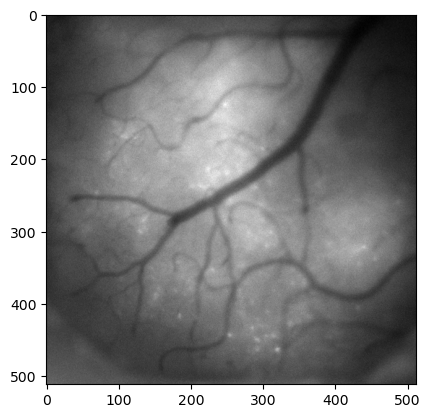

In [7]:


plt.imshow(images[0], cmap='gray')
plt.show()


In [21]:

a_data = 'D:\CaIm\os70\A_data.json'
c_data = 'D:\CaIm\os70\C_data.json'

In [19]:
# Load from JSON file

with open(a_data, 'r') as json_file:
    A_list = json.load(json_file)

# Convert list back to numpy array and then to sparse matrix if needed
A_array = np.array(A_list)
A_sparse = csc_matrix(A_array)

In [22]:
# Load from JSON file
with open(c_data, 'r') as json_file:
    C_list = json.load(json_file)

# Convert list back to numpy array if needed
C_array = np.array(C_list)

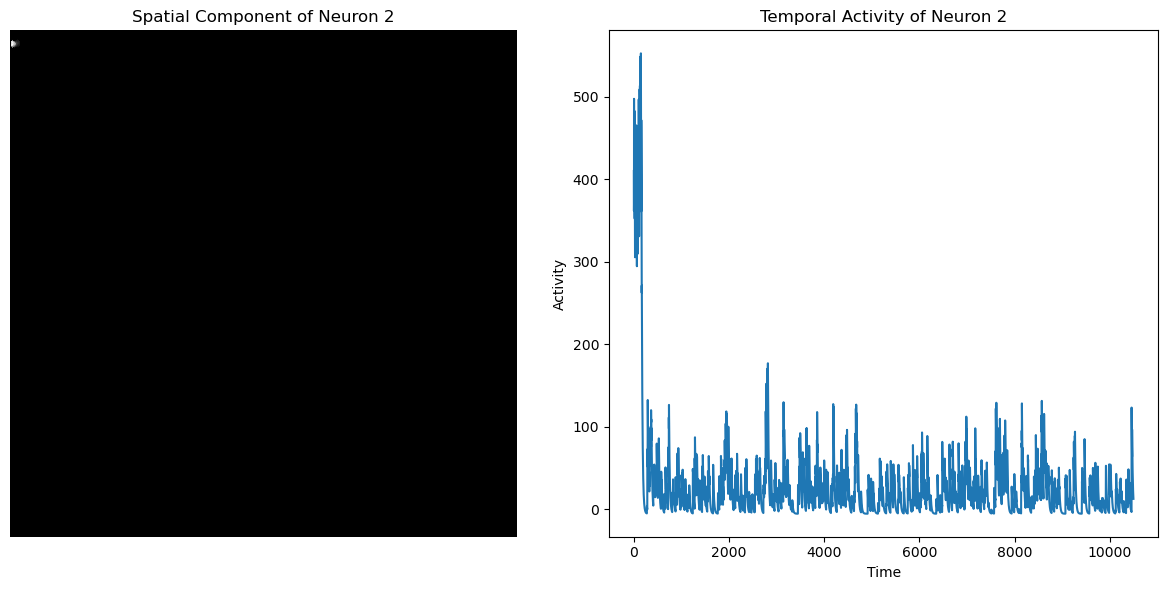

In [26]:


# Assuming A_array is the dense representation of cnm.estimates.A
# and C_array is cnm.estimates.C
# Also assuming you know the original dimensions of the image (d1, d2)
d1 = 512
d2 = 512


# Component number (Python index starts at 0, so component 3 is index 2)
component_num = 1

# Extract spatial and temporal components
spatial_component = A_array[:, component_num].reshape(d1, d2)
temporal_component = C_array[component_num, :]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot spatial component
axs[0].imshow(spatial_component, cmap='gray')
axs[0].set_title(f'Spatial Component of Neuron {component_num + 1}')
axs[0].axis('off')  # Turn off axis

# Plot temporal component
axs[1].plot(temporal_component)
axs[1].set_title(f'Temporal Activity of Neuron {component_num + 1}')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Activity')

plt.tight_layout()
plt.show()


In [33]:
# Compute the mean image
max_image = np.max(images, axis=0)

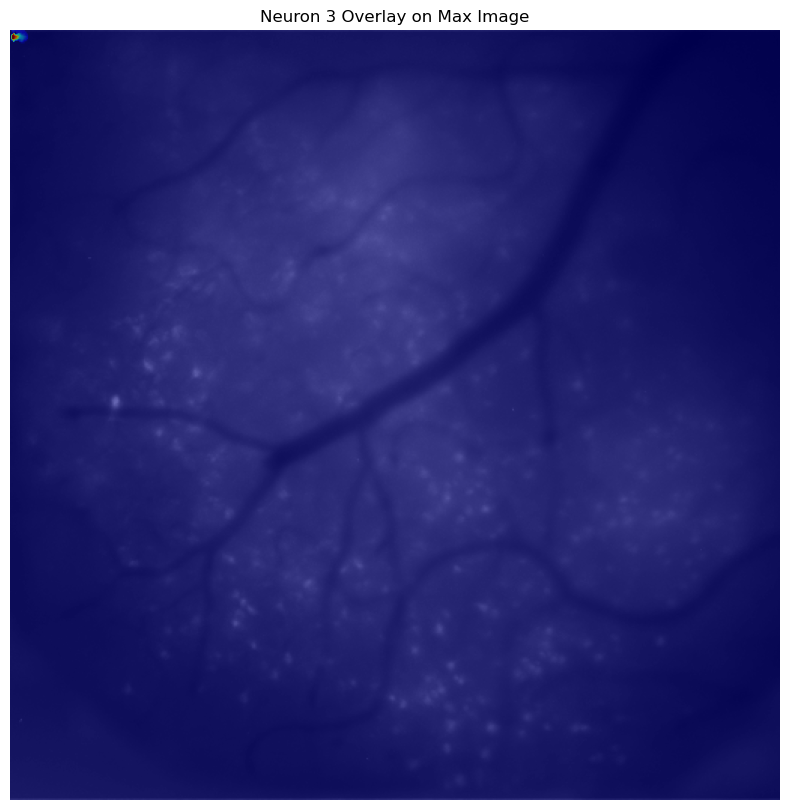

In [35]:
# Component number (Python index starts at 0, so component 3 is index 2)
component_num = 2

# Extract spatial component and reshape
spatial_component = A_array[:, component_num].reshape(d1, d2)
# Create a figure
plt.figure(figsize=(10, 10))

# Display the mean image
plt.imshow(max_image, cmap='gray')

# Overlay the spatial component
# Adjust the alpha to make the overlay more or less transparent
plt.imshow(spatial_component, cmap='jet', alpha=0.6)

# Add titles and labels as needed
plt.title(f'Neuron {component_num + 1} Overlay on Max Image')
plt.axis('off')

plt.show()


In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path

fig, ax = plt.subplots()
ax.imshow(max_image, cmap='gray')

# Function to be called when the polygon is selected
def onselect(verts):
    path = Path(verts)
    plt.gca().add_patch(Polygon(verts, color='red', alpha=0.4))
    plt.gcf().canvas.draw_idle()

    # Mark components as rejected if they fall outside the polygon
    rejected_components = []
    for i, spatial_component in enumerate(cnm.estimates.A.T):
        # Check if the center of the component is inside the polygon
        y, x = np.unravel_index(spatial_component.argmax(), dims)
        if not path.contains_point((x, y)):
            rejected_components.append(i)

    print("Rejected components:", rejected_components)

# Lasso selector
lasso = LassoSelector(ax, onselect)
plt.show()


<IPython.core.display.Javascript object>

In [41]:
%matplotlib widget
